In [244]:
# importing library
import pandas as pd
import numpy as np

Task 1 starts here

Part A

In [245]:
data=pd.DataFrame(pd.read_csv("Customer Data.csv")) # reading data
data.tail(10) # displaying last 10 rows of data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
200,199,Male,32.0,137.0,18.0
201,200,Male,30.0,137.0,83.0
202,135,Male,20.0,73.0,5.0
203,136,Female,29.0,73.0,88.0
204,137,Female,44.0,NaN,NaN
205,138,Male,32.0,73.0,NaN
206,139,Male,NaN,74.0,NaN
207,140,Female,35.0,74.0,NaN
208,141,Female,57.0,75.0,NaN
209,142,Male,32.0,75.0,NaN


In [246]:
# counting and printing null values
print(data.isna().sum())

CustomerID                 0
Gender                     1
Age                        2
Annual Income (k$)         2
Spending Score (1-100)    10
dtype: int64


In [247]:
# dropping all rows with null values
data1=data.dropna()
data1

# we dropped because this had less than 5% effect on original data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15.0,39.0
1,2,Male,21.0,15.0,81.0
2,3,Female,20.0,16.0,6.0
3,4,Female,23.0,16.0,77.0
4,5,Female,31.0,17.0,40.0
...,...,...,...,...,...
199,198,Male,32.0,126.0,74.0
200,199,Male,32.0,137.0,18.0
201,200,Male,30.0,137.0,83.0
202,135,Male,20.0,73.0,5.0


In [248]:
# dropping duplicate values
data1.drop_duplicates(keep=False,inplace=True)
print(data1)

     CustomerID  Gender   Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male  19.0                15.0                    39.0
1             2    Male  21.0                15.0                    81.0
2             3  Female  20.0                16.0                     6.0
3             4  Female  23.0                16.0                    77.0
4             5  Female  31.0                17.0                    40.0
..          ...     ...   ...                 ...                     ...
197         196  Female  35.0               120.0                    79.0
198         197  Female  45.0               126.0                    28.0
199         198    Male  32.0               126.0                    74.0
200         199    Male  32.0               137.0                    18.0
201         200    Male  30.0               137.0                    83.0

[191 rows x 5 columns]


/Applications/Anaconda/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [249]:
# dropping unnecessary features and converting string to numbers
data1=data1.drop('CustomerID',axis=1)
data1=data1.drop('Gender',axis=1)
pd.to_numeric(data1["Age"])
pd.to_numeric(data1["Annual Income (k$)"])
pd.to_numeric(data1["Spending Score (1-100)"]);

Part B

In [250]:
# computing PCA
data=data1

from sklearn.decomposition import PCA 
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
pca = PCA(n_components=2)
components = pca.fit_transform(X)
c1 = components[:,0]
c2 = components[:,1]
print(data)

      Age  Annual Income (k$)  Spending Score (1-100)
0    19.0                15.0                    39.0
1    21.0                15.0                    81.0
2    20.0                16.0                     6.0
3    23.0                16.0                    77.0
4    31.0                17.0                    40.0
..    ...                 ...                     ...
197  35.0               120.0                    79.0
198  45.0               126.0                    28.0
199  32.0               126.0                    74.0
200  32.0               137.0                    18.0
201  30.0               137.0                    83.0

[191 rows x 3 columns]


Part C

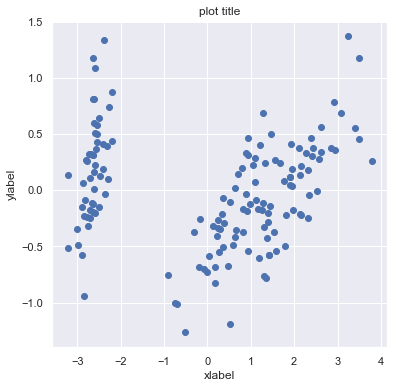

In [251]:
# plotting the data
import matplotlib.pyplot as plt
plt.subplots(figsize=(6,6))
plt.scatter(c1,c2)
plt.title('plot title')
plt.xlabel("xlabel")
plt.ylabel('ylabel');

Task 2 starts here

Part A

In [252]:
# implementing k-means algorithm
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

x = data.iloc[:,1:3] # 1t for rows and second for columns
x

kmeans = KMeans(3)
kmeans.fit(x)
y = kmeans.fit_predict(x)
# y

Part B

In [253]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
from numpy import reshape
import seaborn as sns

In [254]:
iris = load_iris()
# x = iris.data
# y = iris.target

tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 191 samples in 0.000s...
[t-SNE] Computed neighbors for 191 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 191 / 191
[t-SNE] Mean sigma: 10.042140
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.024986
[t-SNE] KL divergence after 1000 iterations: 0.115851


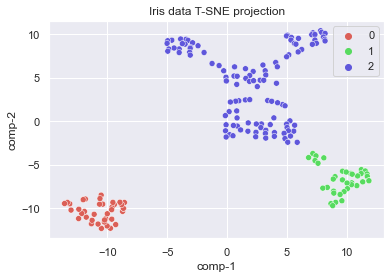

In [255]:
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 3),
                data=df).set(title="Iris data T-SNE projection");

Part C

Text(0, 0.5, 'WCSS')

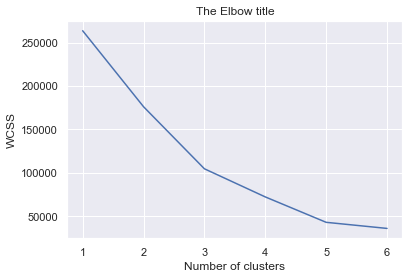

In [256]:
wcss=[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')